In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
%matplotlib inline

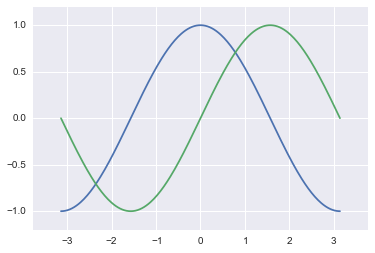

In [3]:
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C,S = np.cos(X), np.sin(X)
margin = 1.2
plt.plot(X,C)
plt.plot(X,S)
plt.xlim([X.min() * margin, X.max() * margin])
plt.ylim([C.min() * margin, C.max() * margin])
plt.show()

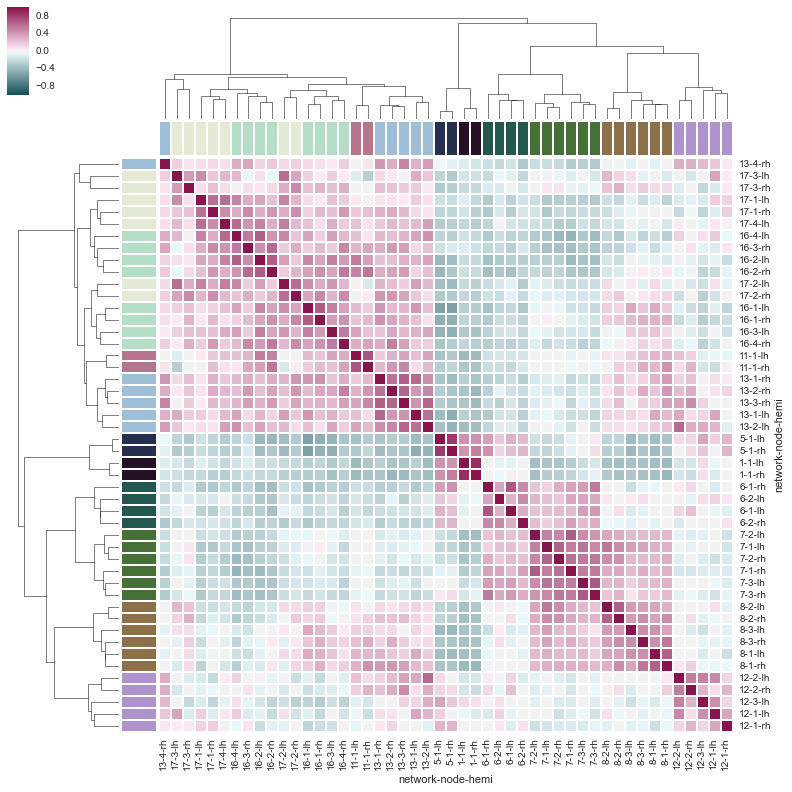

In [4]:
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)
used_networks = [1, 5, 6, 7, 8, 11, 12, 13, 16, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]
network_pal = sns.cubehelix_palette(len(used_networks),
                                    light=.9, dark=.1, reverse=True,
                                    start=1, rot=-2)
network_lut = dict(zip(map(str, used_networks), network_pal))
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks).map(network_lut)
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)
sns.clustermap(df.corr(), row_colors=network_colors, linewidths=.5,
               col_colors=network_colors, figsize=(13, 13), cmap=cmap)

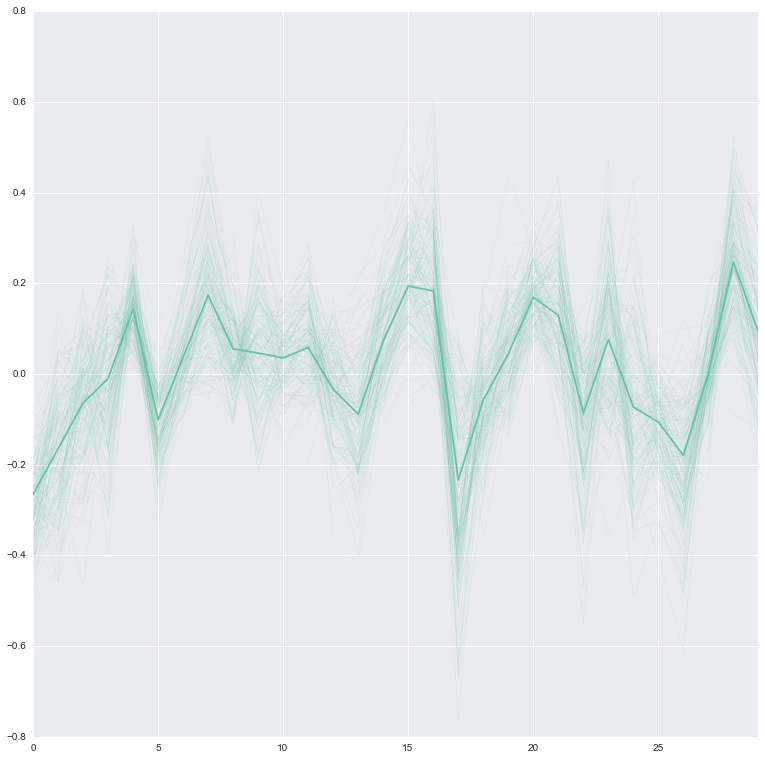

In [8]:
import numpy as np
import seaborn as sns
sns.set(style="darkgrid", palette="Set2")

# Create a noisy periodic dataset
sines = []
rs = np.random.RandomState(20)

for _ in range(15):
    x = np.linspace(0, 30 / 2, 30)
    y = np.sin(x*rs.normal(0, 0.002)) + rs.normal(0, 1.5) * rs.normal(0, .3, 30)
    sines.append(y)

# Plot the average over replicates with bootstrap resamples
plt.figure(figsize=(13, 13))
?sns.tsplot
sns.tsplot(sines, err_style="boot_traces", n_boot=150)
